# Step 1: Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image 
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

In [2]:
skin_CD = pd.read_csv("HAM10000_metadata.csv")

In [3]:
skin_CD

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

# Step 2: Making a Dictionary of images and labels

In [4]:
project_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('C:/Users/abhis/Skin Cancer/HAM10000/','*','*.jpg'))}

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Step 3:Reading and Processing Data

In [6]:
skin_CD = pd.read_csv(os.path.join('C:/Users/abhis/Skin Cancer/HAM10000/','C:/Users/abhis/Skin Cancer/HAM10000/HAM10000_metadata.csv'))

In [7]:
skin_CD['route'] = skin_CD['image_id'].map(project_path_dict.get)
skin_CD['skin_type'] = skin_CD['dx'].map(lesion_type_dict.get) 
skin_CD['skin_type_idx'] = pd.Categorical(skin_CD['skin_type']).codes

In [8]:
skin_CD.head(n = 10)

lesion_id      image_id   dx dx_type   age     sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear   
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear   
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face   
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face   
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back   
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back   

                                               route  \
0  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
1  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
3  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
4  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
5  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
6  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
7  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
8  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                        skin_type  skin_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2  
5  Benign keratosis-like lesions               2  
6  Benign keratosis-like lesions               2  
7  Benign keratosis-like lesions               2  
8  Benign keratosis-like lesions               2  
9  Benign keratosis-like lesions               2

In [9]:
skin_CD.tail(n = 10)

lesion_id      image_id     dx dx_type   age     sex  \
10005  HAM_0005579  ISIC_0028393  akiec   histo  80.0    male   
10006  HAM_0004034  ISIC_0024948  akiec   histo  55.0  female   
10007  HAM_0001565  ISIC_0028619  akiec   histo  60.0  female   
10008  HAM_0001576  ISIC_0033705  akiec   histo  60.0    male   
10009  HAM_0005705  ISIC_0031430  akiec   histo  75.0  female   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female   

          localization                                              route  \
10005             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10006             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10007             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10008             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10009  lower extremity  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10010          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10011          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10012          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10013             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10014             back  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

               skin_type  skin_type_idx  
10005  Actinic keratoses              0  
10006  Actinic keratoses              0  
10007  Actinic keratoses              0  
10008  Actinic keratoses              0  
10009  Actinic keratoses              0  
10010  Actinic keratoses              0  
10011  Actinic keratoses              0  
10012  Actinic keratoses              0  
10013  Actinic keratoses              0  
10014           Melanoma              5

# Step 4: Data Cleaning

In [10]:
skin_CD.shape

(10015, 10)

In [11]:
print(skin_CD.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
route             object
skin_type         object
skin_type_idx       int8
dtype: object


In [12]:
skin_CD.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
route             0
skin_type         0
skin_type_idx     0
dtype: int64

In [13]:
skin_CD['age'].fillna((skin_CD['age'].mean()), inplace=True)

In [14]:
skin_CD.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
route            0
skin_type        0
skin_type_idx    0
dtype: int64

# Step 5: Explotary Data Analysis

In [15]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sex', 'Localisation', 'Age', 'Skin Type'],
                    vertical_spacing=0.15,
                    column_widths=[0.4, 0.6])

fig.add_trace(go.Bar(
            x=skin_CD['sex'].value_counts().index, 
            y=skin_CD['sex'].value_counts()),
            row=1, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['localization'].value_counts().index, 
            y=skin_CD['localization'].value_counts()),
            row=1, col=2)
fig.add_trace(go.Histogram(
            x=skin_CD['age']),
            row=2, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['dx'].value_counts().index.map(lesion_type_dict.get), 
            y=skin_CD['dx'].value_counts()),
            row=2, col=2)


for i in range(4):
    fig.update_yaxes(title_text='Count', row=i//2+1, col=i%2+1)
fig.update_layout(title='Distribution of Data', height=800)

fig.show()

Text(0.5, 1.0, 'Diagnosis Test Type: Distribution Plot')

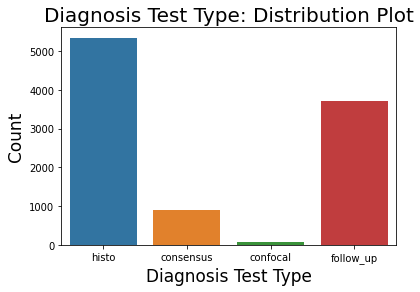

In [16]:
sns.countplot(x = "dx_type", data = skin_CD)
plt.xlabel("Diagnosis Test Type", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.title("Diagnosis Test Type: Distribution Plot", fontsize=20)

C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age', ylabel='skin_type_idx'>

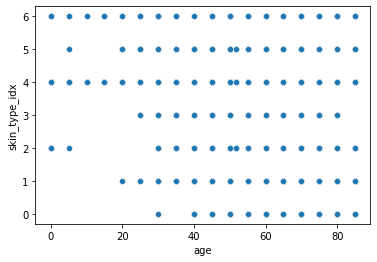

In [17]:
sns.scatterplot('age','skin_type_idx',data=skin_CD)

In [18]:
skin_CD.skin_type_idx.value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: skin_type_idx, dtype: int64

# Step 6: Oversampling

In [19]:
class_4,class_5,class_2,class_1,class_0,class_6,class_3 = skin_CD.skin_type_idx.value_counts()

skin_class_0 = skin_CD[skin_CD['skin_type_idx'] == 0]
skin_class_1 = skin_CD[skin_CD['skin_type_idx'] == 1]
skin_class_2 = skin_CD[skin_CD['skin_type_idx'] == 2]
skin_class_3 = skin_CD[skin_CD['skin_type_idx'] == 3]
skin_class_4 = skin_CD[skin_CD['skin_type_idx'] == 4]
skin_class_5 = skin_CD[skin_CD['skin_type_idx'] == 5]
skin_class_6 = skin_CD[skin_CD['skin_type_idx'] == 6]

In [20]:
class_0,class_1,class_2,class_3,class_4,class_5,class_6

(327, 514, 1099, 115, 6705, 1113, 142)

In [21]:
skin_class_0.shape

(327, 10)

In [22]:
skin_class_1.shape

(514, 10)

In [23]:
skin_class_2.shape

(1099, 10)

In [24]:
skin_class_3.shape

(115, 10)

In [25]:
skin_class_4.shape

(6705, 10)

In [26]:
skin_class_5.shape

(1113, 10)

In [27]:
skin_class_6.shape

(142, 10)

In [28]:
skin_class_0_over = skin_class_0.sample(class_4,replace = True)

In [29]:
skin_class_0_over.shape

(6705, 10)

In [30]:
skin_class_1_over = skin_class_1.sample(class_4,replace = True)

In [31]:
skin_class_1_over.shape

(6705, 10)

In [32]:
skin_class_2_over = skin_class_2.sample(class_4,replace = True)

In [33]:
skin_class_2_over.shape

(6705, 10)

In [34]:
skin_class_3_over = skin_class_3.sample(class_4,replace = True)

In [35]:
skin_class_3_over.shape

(6705, 10)

In [36]:
skin_class_5_over = skin_class_5.sample(class_4,replace = True)

In [37]:
skin_class_5_over.shape

(6705, 10)

In [38]:
skin_class_6_over = skin_class_6.sample(class_4,replace = True)

In [39]:
skin_class_6_over.shape

(6705, 10)

In [40]:
skin_CD_test_over = pd.concat([skin_class_0_over,skin_class_1_over,skin_class_2_over,skin_class_3_over
                               ,skin_class_4,skin_class_5_over,skin_class_6_over], axis = 0)

In [41]:
skin_CD_test_over.shape

(46935, 10)

In [42]:
print('Random over-sampling:')
print(skin_CD_test_over.skin_type_idx.value_counts())

Random over-sampling:
0    6705
1    6705
2    6705
3    6705
4    6705
5    6705
6    6705
Name: skin_type_idx, dtype: int64


# Step 7:Loading and Resizing of Images

In [43]:
skin_CD_test_over['image'] = skin_CD_test_over['route'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [44]:
skin_CD_test_over.head()

lesion_id      image_id     dx dx_type   age   sex     localization  \
9774  HAM_0005389  ISIC_0031012  akiec   histo  70.0  male  lower extremity   
9816  HAM_0004563  ISIC_0031211  akiec   histo  75.0  male  lower extremity   
9751  HAM_0003086  ISIC_0032349  akiec   histo  60.0  male  lower extremity   
9751  HAM_0003086  ISIC_0032349  akiec   histo  60.0  male  lower extremity   
9697  HAM_0006898  ISIC_0031040  akiec   histo  80.0  male            scalp   

                                                  route          skin_type  \
9774  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9816  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9751  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9751  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9697  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   

      skin_type_idx                                              image  
9774              0  [[[205, 158, 197], [213, 162, 203], [212, 163,...  
9816              0  [[[192, 152, 169], [194, 153, 173], [199, 159,...  
9751              0  [[[173, 123, 111], [173, 120, 110], [173, 119,...  
9751              0  [[[173, 123, 111], [173, 120, 110], [173, 119,...  
9697              0  [[[213, 174, 187], [213, 170, 178], [213, 168,...

# Step 7: Take out the sample data

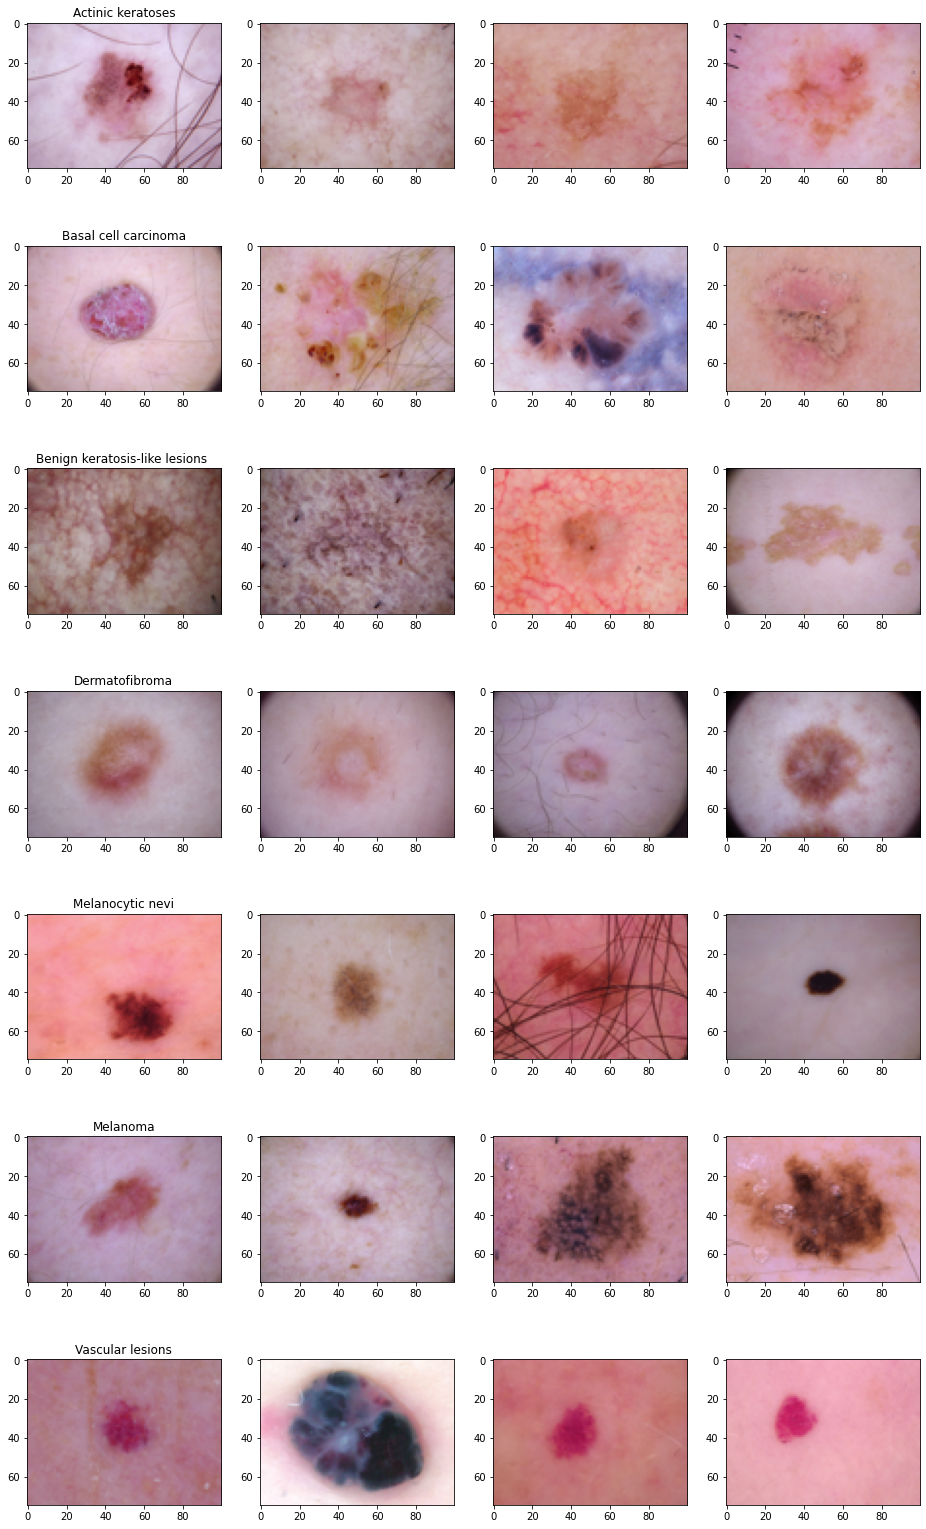

In [45]:
n_samples = 4
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 4*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_CD_test_over.sort_values(['skin_type']).groupby('skin_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=41).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('on')
fig.savefig('samples.png', dpi=300)

# Step 8: Selection of Depended and Independed Variables

In [46]:
features=skin_CD_test_over.drop(columns=['skin_type_idx','skin_type','dx'],axis=1)
target=skin_CD_test_over['skin_type_idx']

# Step 9: Train and Test Data Splitting

In [47]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=41, stratify = target)

In [48]:
x_train.head()

lesion_id      image_id dx_type   age     sex     localization  \
9925  HAM_0006301  ISIC_0024468   histo  75.0    male             neck   
2605  HAM_0005396  ISIC_0033720   histo  75.0    male          abdomen   
294   HAM_0003800  ISIC_0026623   histo  70.0    male  upper extremity   
2545  HAM_0000463  ISIC_0032415   histo  70.0  female             face   
2102  HAM_0000125  ISIC_0028777   histo  60.0    male  lower extremity   

                                                  route  \
9925  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2605  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
294   C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2545  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2102  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                                                  image  
9925  [[[238, 144, 163], [237, 141, 159], [238, 134,...  
2605  [[[147, 130, 147], [148, 133, 148], [151, 138,...  
294   [[[204, 158, 162], [199, 153, 152], [199, 153,...  
2545  [[[75, 58, 71], [98, 80, 95], [118, 99, 115], ...  
2102  [[[244, 203, 197], [246, 204, 198], [248, 208,...

In [49]:
x_test.head()

lesion_id      image_id    dx_type   age     sex     localization  \
1189  HAM_0005529  ISIC_0025980  consensus  55.0  female  lower extremity   
9896  HAM_0007601  ISIC_0027447      histo  65.0    male  upper extremity   
9993  HAM_0000545  ISIC_0026650      histo  70.0    male             face   
2467  HAM_0007009  ISIC_0027146      histo  50.0    male             back   
1154  HAM_0005663  ISIC_0026417  consensus  30.0    male  lower extremity   

                                                  route  \
1189  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9896  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9993  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2467  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
1154  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                                                  image  
1189  [[[226, 140, 138], [225, 140, 140], [229, 144,...  
9896  [[[205, 143, 121], [205, 140, 119], [205, 147,...  
9993  [[[197, 144, 149], [196, 145, 146], [195, 149,...  
2467  [[[126, 106, 99], [145, 126, 117], [162, 140, ...  
1154  [[[204, 163, 198], [204, 162, 197], [204, 160,...

In [50]:
y_train.value_counts()

1    4694
5    4694
6    4694
0    4693
2    4693
4    4693
3    4693
Name: skin_type_idx, dtype: int64

In [51]:
y_test.value_counts()

3    2012
0    2012
2    2012
4    2012
1    2011
6    2011
5    2011
Name: skin_type_idx, dtype: int64

# Step 10:Normalization

In [53]:
x_train_1 = x_train['image'].tolist()

x_train_mean = np.mean(x_train_1)
x_train_std = np.std(x_train_1)

x_train_1 = (x_train_1 - x_train_mean)/x_train_std

MemoryError: Unable to allocate 5.51 GiB for an array with shape (32854, 75, 100, 3) and data type float64

In [ ]:
print('Train min=%.3f, max=%.3f' % (x_train_1.min(), x_train_1.max()))

In [ ]:
fig, (ax) = plt.subplots(2, 2, figsize = (10, 10))
k = 0 
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_train_1[k])
        ax[i,j].axis('on')
        k = k + 1  
    plt.tight_layout()

# Step 11: Label Encoding

In [ ]:
y_train_1 = to_categorical(y_train, num_classes = 7)
y_test_1 = to_categorical(y_test, num_classes = 7)

In [ ]:
print(y_train_1)

In [ ]:
print(y_test_1)

# Step 15: Model Testing and Model Evaluation

In [ ]:
x_test_1 = x_test['image'].tolist()

x_test_mean = np.mean(x_test_1)
x_test_std = np.std(x_test_1)

x_test_1 = (x_test_1 - x_test_mean)/x_test_std

# Step 18: Inception V4

In [ ]:
from tensorflow.compat.v1.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

input_shape = (75, 100, 3)

num_labels = 7

base_model = InceptionV3(include_top = False, input_shape = input_shape,pooling = 'avg', 
                         weights = 'imagenet')
model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = 'softmax',kernel_regularizer=regularizers.l2(0.02)))

for layer in base_model.layers:
    layer.trainable = True

model.summary()

In [ ]:
optimizer = Adam (learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=5e-7, amsgrad=False)
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
y_train_1 = np.argmax(y_train_1, axis = 1)

In [ ]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(x_train_1)

In [ ]:
epochs = 75
batch_size = 64
history = model.fit(datagen.flow(x_train_1, y_train_1, batch_size = batch_size),
                              epochs = epochs,
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

In [ ]:
y_test_1 = np.argmax(y_test_1, axis =1)

In [ ]:
loss, Inception_accuracy = model.evaluate(x_test_1, y_test_1, verbose = 0)
print("Test: accuracy = %f;  loss = %f" % ( Inception_accuracy, loss))
model.save("Inception_Model_75_64.h5")

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [ ]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#The number of correct and incorrect predictions are summarized with count values and broken down by each class in a confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = y_test_1
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))